
Decision Tree (ccp_alpha=0.001) Results:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-score: 0.74

Decision Tree (ccp_alpha=0.01) Results:
Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1-score: 0.72

Decision Tree (ccp_alpha=0.05) Results:
Accuracy: 0.71
Precision: 0.72
Recall: 0.71
F1-score: 0.71


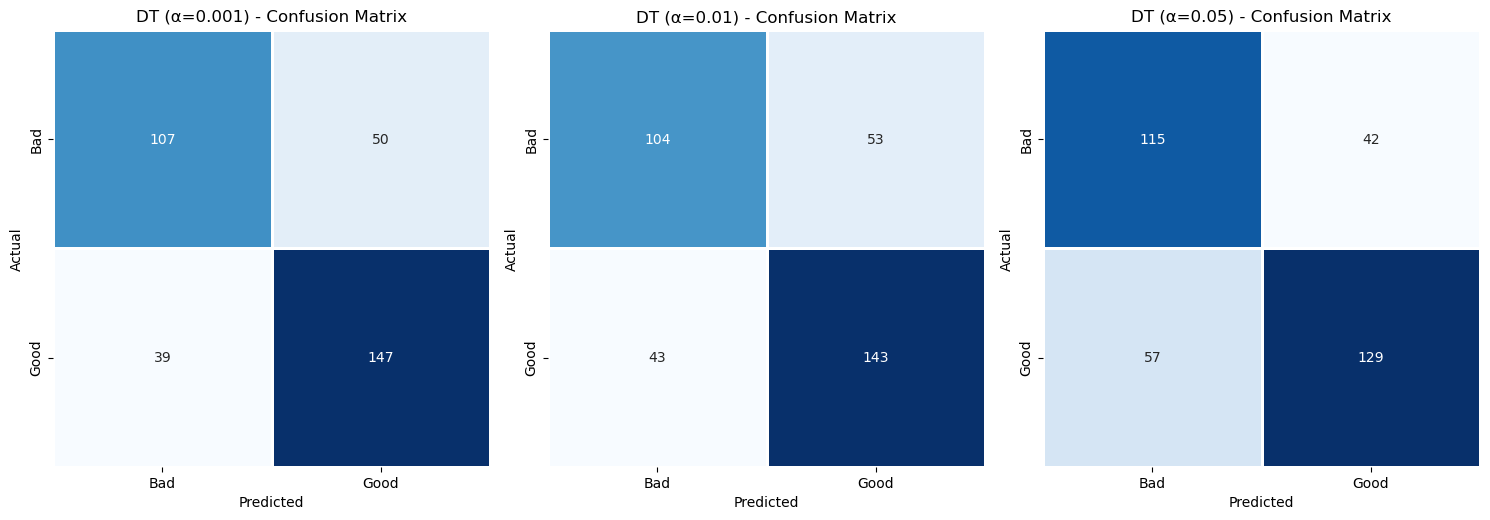

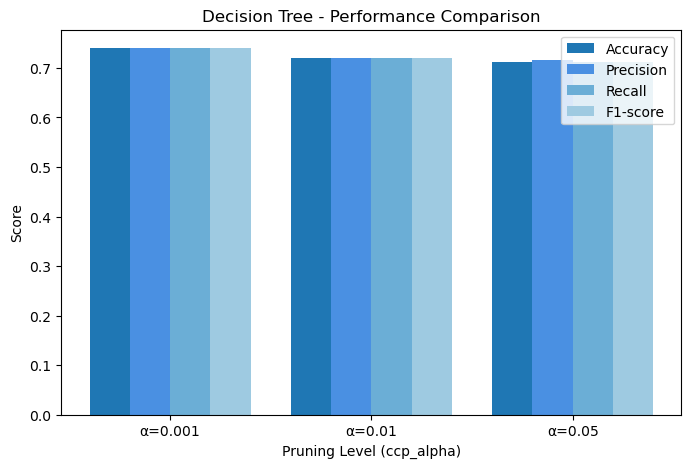

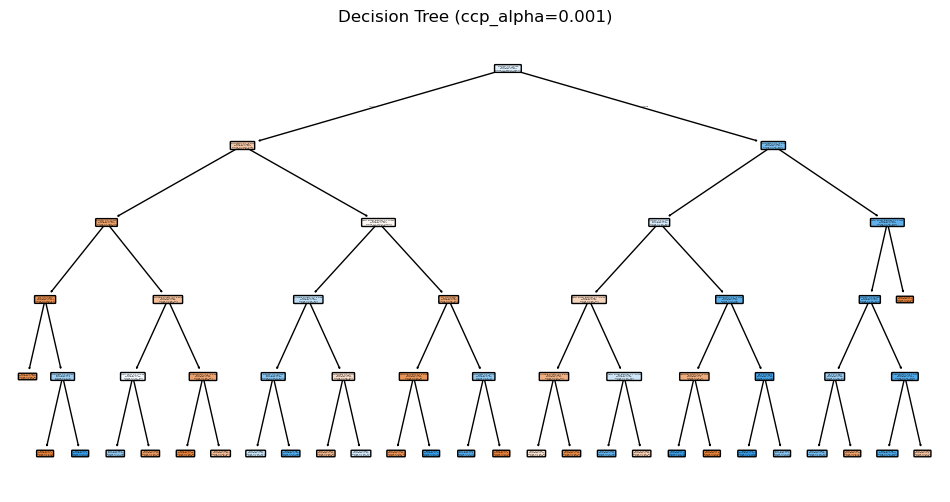

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
file_path = (r"C:\Users\KIIT\Downloads\archive (3)\WineQT.csv")
df = pd.read_csv(file_path)

# Convert quality to binary classification: Good (>=6) and Bad (<6)
df["quality"] = df["quality"].apply(lambda x: 1 if x >= 6 else 0)

# Split features and target
X = df.drop(columns=["quality"])
y = df["quality"]

# Train-test split (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Decision Tree with pruning (post-pruning using ccp_alpha)
ccp_alpha_values = [0.001, 0.01, 0.05]  # Different levels of pruning
dt_results = {}

for alpha in ccp_alpha_values:
    dt = DecisionTreeClassifier(max_depth=5, ccp_alpha=alpha, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    # Store evaluation metrics
    dt_results[alpha] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1_score": f1_score(y_test, y_pred, average='weighted'),
        "conf_matrix": confusion_matrix(y_test, y_pred),
        "model": dt
    }

# Print metrics for each pruning level
for alpha, result in dt_results.items():
    print(f"\nDecision Tree (ccp_alpha={alpha}) Results:")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(f"Precision: {result['precision']:.2f}")
    print(f"Recall: {result['recall']:.2f}")
    print(f"F1-score: {result['f1_score']:.2f}")

# 🔹 Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, alpha in enumerate(ccp_alpha_values):
    ax = axes[i]
    sns.heatmap(dt_results[alpha]["conf_matrix"], annot=True, fmt='d', cmap="Blues", linewidths=1, square=True,
                xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"], cbar=False, ax=ax)
    ax.set_title(f"DT (α={alpha}) - Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# 🔹 Performance Comparison
accuracy_dt = [dt_results[alpha]["accuracy"] for alpha in ccp_alpha_values]
precision_dt = [dt_results[alpha]["precision"] for alpha in ccp_alpha_values]
recall_dt = [dt_results[alpha]["recall"] for alpha in ccp_alpha_values]
f1_dt = [dt_results[alpha]["f1_score"] for alpha in ccp_alpha_values]

metrics_dt = [accuracy_dt, precision_dt, recall_dt, f1_dt]
metrics_names = ["Accuracy", "Precision", "Recall", "F1-score"]
colors = ["#1f77b4", "#4a90e2", "#6baed6", "#9ecae1"]  # Different shades of blue

plt.figure(figsize=(8,5))
x = np.arange(len(ccp_alpha_values))  # Bar positions

for i, metric in enumerate(metrics_dt):
    plt.bar(x + i*0.2, metric, width=0.2, label=metrics_names[i], color=colors[i])

plt.xticks(x + 0.3, [f"α={alpha}" for alpha in ccp_alpha_values])
plt.xlabel("Pruning Level (ccp_alpha)")
plt.ylabel("Score")
plt.title("Decision Tree - Performance Comparison")
plt.legend()
plt.show()

# 🔹 Plot the Decision Tree for the best-performing alpha
best_alpha = max(ccp_alpha_values, key=lambda a: dt_results[a]["accuracy"])  # Choose best pruning level
best_model = dt_results[best_alpha]["model"]

plt.figure(figsize=(12, 6))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=["Bad", "Good"], rounded=True)
plt.title(f"Decision Tree (ccp_alpha={best_alpha})")
plt.show()


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_depth = None
best_accuracy = 0

print("\nTuning Decision Tree:")

for depth in [3, 5, 10, 15, 20, None]:  # Testing different depths
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Max Depth={depth}, Accuracy={acc:.4f}")
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_depth = depth

print(f"\nBest Max Depth: {best_depth} with Accuracy: {best_accuracy:.4f}")



Tuning Decision Tree:
Max Depth=3, Accuracy=0.7201
Max Depth=5, Accuracy=0.7405
Max Depth=10, Accuracy=0.7405
Max Depth=15, Accuracy=0.7172
Max Depth=20, Accuracy=0.7172
Max Depth=None, Accuracy=0.7172

Best Max Depth: 5 with Accuracy: 0.7405


In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Save results to CSV
model_name = "Decision Tree Fine Tuned"  
df_results = pd.DataFrame({"Model": [model_name], "Accuracy": [best_accuracy], "Precision": [precision], "Recall": [recall], "F1-score": [f1]})
df_results.to_csv(f"{model_name}_results.csv", index=False)
